# Sub question 4: Education

Intro

Welke indicator wordt hier gebruikt? Wat is de data die beschikbaar is? Missing data? Op welke manier wordt de value gegeven? In percentages, absolute aantallen?

Verschil tussen mannen en vrouw in education. Dit visualiseren met behulp van een bar plot waar bars bovenop elkaar worden geplot. 

Grafiek van de verandering ontwikkelingen over de jaren heen per land. Met een lijn van man en een lijn van vrouw

subconclusion

In [24]:
# import World Bank data
import wbdata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [18]:
#wbdata.get_source()

In [14]:
#wbdata.get_indicator(source=16)

In [ ]:
#Indicators
# SE.PRM.NENR.MA      	School enrollment, primary, male (% net)
# SE.PRM.NENR.FE      	School enrollment, primary, female (% net)
# SE.SEC.NENR.MA      	School enrollment, secondary, male (% net)
# SE.SEC.NENR.FE      	School enrollment, secondary, female (% net)
# SE.PRM.CMPT.MA.ZS   	Primary completion rate, male (% of relevant age group)
# SE.PRM.CMPT.FE.ZS   	Primary completion rate, female (% of relevant age group)
# SE.ADT.LITR.MA.ZS   	Literacy rate, adult male (% of males ages 15 and above)
# SE.ADT.LITR.FE.ZS   	Literacy rate, adult female (% of females ages 15 and above)
# SE.ADT.1524.LT.FM.ZS	Literacy rate, youth (ages 15-24), gender parity index (GPI)

In [34]:
def clean(indicator):
    #create data frame
    name = pd.DataFrame(wbdata.get_data(indicator))
    
    #clean the date
    name['country_code'] = name.country.astype(str).str.slice(8,10)
    name['country'] = name.country.astype(str).str.slice(23,-2)
    name['indicator'] = name.indicator.astype(str).str.slice(35,-2)
    name["date"] = name["date"].astype(int) 
    name["value"] = name["value"].astype(float).round(2)
    return name

In [35]:
# make a dataframe from the indicator of gender equality rate
CPIA_all = clean("IQ.CPA.GNDR.XQ")

# Filter the dataset on year and on country code which are not numeric
CPIA_all_year_alpha = CPIA_all.loc[(CPIA_all['date'] == 2017) & (CPIA_all.country_code.str.isalpha())]
CPIA_OnlyCountries = CPIA_all_year_alpha[17:]

#sort the countries by 'value' (their rating) and only show the Top 15
CPIA_worst15 = CPIA_OnlyCountries.sort_values(by='value', ascending=True)[:15]

In [ ]:
# Make a dataframe from the GDP data
GDP_all = clean("NY.GDP.PCAP.CD")

# Make the value in the column "date" a string
GDP_all["date"] = GDP_all.date.astype(str)
CPIA_worst15["date"] = CPIA_worst15["date"].astype(str)

In [20]:
wbdata.get_data("SE.PRM.NENR.MA")
wbdata.get_data("SE.PRM.NENR.FE")
wbdata.get_data("SE.SEC.NENR.MA")
wbdata.get_data("SE.SEC.NENR.FE")
wbdata.get_data("SE.PRM.CMPT.MA.ZS")
wbdata.get_data("SE.PRM.CMPT.FE.ZS")
wbdata.get_data("SE.ADT.LITR.MA.ZS")
wbdata.get_data("SE.ADT.LITR.FE.ZS")
wbdata.get_data("SE.ADT.1524.LT.FM.ZS")

[{'indicator': {'id': 'SE.ADT.1524.LT.FM.ZS',
   'value': 'Literacy rate, youth (ages 15-24), gender parity index (GPI)'},
  'country': {'id': '1A', 'value': 'Arab World'},
  'value': None,
  'decimal': '2',
  'date': '2017'},
 {'indicator': {'id': 'SE.ADT.1524.LT.FM.ZS',
   'value': 'Literacy rate, youth (ages 15-24), gender parity index (GPI)'},
  'country': {'id': '1A', 'value': 'Arab World'},
  'value': '0.93649',
  'decimal': '2',
  'date': '2016'},
 {'indicator': {'id': 'SE.ADT.1524.LT.FM.ZS',
   'value': 'Literacy rate, youth (ages 15-24), gender parity index (GPI)'},
  'country': {'id': '1A', 'value': 'Arab World'},
  'value': '0.93417',
  'decimal': '2',
  'date': '2015'},
 {'indicator': {'id': 'SE.ADT.1524.LT.FM.ZS',
   'value': 'Literacy rate, youth (ages 15-24), gender parity index (GPI)'},
  'country': {'id': '1A', 'value': 'Arab World'},
  'value': '0.93081',
  'decimal': '2',
  'date': '2014'},
 {'indicator': {'id': 'SE.ADT.1524.LT.FM.ZS',
   'value': 'Literacy rate, you

In [29]:
# Make a dataframe from the indicators data
Primary_School_Male = clean ('SE.PRM.NENR.MA')
Primary_School_Female = clean ('SE.PRM.NENR.FE')
Secundary_School_Male = clean ('SE.SEC.NENR.MA')
Secundary_School_Female = clean ('SE.SEC.NENR.FE')
Complete_PrimSchool_Male = clean ('SE.PRM.CMPT.MA.ZS')
Complete_PrimSchool_Female = clean ('SE.PRM.CMPT.FE.ZS')
Literacy_Rate_Male = clean ('SE.ADT.LITR.MA.ZS')
Literacy_Rate_Female = clean ('SE.ADT.LITR.FE.ZS')
GPI = clean ('SE.ADT.1524.LT.FM.ZS')

In [43]:
#find rows where the value is greater than 0
PSM_All = Primary_School_Male.loc[(Primary_School_Male["value"] >= 0)]
PSF_All = Primary_School_Female.loc[(Primary_School_Female['value'] >=0)]

#find the rows with the most recent data
PSM_recent = PSM_All.sort_values("date", ascending = False).drop_duplicates(["country"])
PSM_recent["date"] = PSM_recent.date.astype(str)

PSF_recent = PSF_All.sort_values('date', ascending = False).drop_duplicates(['country'])
PSF_recent['date'] = PSF_All.date.astype(str)

In [47]:
PSM15_worst15 = pd.merge( CPIA_worst15, PSM_recent, how = "left", left_on = ["country"], right_on = ["country"])
PSF15_worst15 = pd.merge( CPIA_worst15, PSF_recent, how = 'left', left_on = ["country"], right_on = ["country"])


# Stack plots

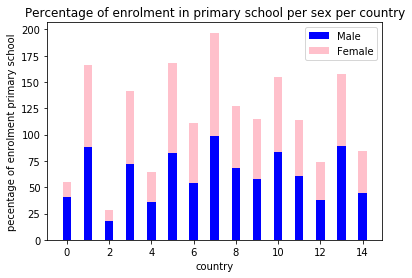

In [58]:
#make array of needed columns
PSM15 = PSM15_worst15.value_y.values
PSF15 = PSF15_worst15.value_y.values

N = len(PSM15_worst15)
ind = np.arange(N)
width = 0.4

p1 = plt.bar(ind, PSM15, width, label = 'Male', color='blue')
p2 = plt.bar(ind, PSF15, width, bottom=PSM15, label = 'Female', color='pink')

plt.ylabel ('pecentage of enrolment primary school')
plt.xlabel ('country')
plt.title ('Percentage of enrolment in primary school per sex per country')

plt.legend()
plt.show()
